In [1]:
from sklearn import datasets
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
print('Features: ', wine.feature_names)
print('Labels: ', wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
#wine=wine.sample(frac=1)

In [3]:
data = wine.data
target = wine.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3, random_state=109)

In [5]:
print('Xtrain : ',X_train.shape)
print('Xtest : ',X_test.shape)
print('Ytrain : ',y_train.shape)
print('Ytest : ',y_test.shape)

Xtrain :  (124, 13)
Xtest :  (54, 13)
Ytrain :  (124,)
Ytest :  (54,)


In [6]:
print('Xtrain : ',X_train[:5])
print('Xtest : ',X_test[:5])
print('Ytrain : ',y_train[:5])
print('Ytest : ',y_test[:5])

Xtrain :  [[1.323e+01 3.300e+00 2.280e+00 1.850e+01 9.800e+01 1.800e+00 8.300e-01
  6.100e-01 1.870e+00 1.052e+01 5.600e-01 1.510e+00 6.750e+02]
 [1.384e+01 4.120e+00 2.380e+00 1.950e+01 8.900e+01 1.800e+00 8.300e-01
  4.800e-01 1.560e+00 9.010e+00 5.700e-01 1.640e+00 4.800e+02]
 [1.220e+01 3.030e+00 2.320e+00 1.900e+01 9.600e+01 1.250e+00 4.900e-01
  4.000e-01 7.300e-01 5.500e+00 6.600e-01 1.830e+00 5.100e+02]
 [1.288e+01 2.990e+00 2.400e+00 2.000e+01 1.040e+02 1.300e+00 1.220e+00
  2.400e-01 8.300e-01 5.400e+00 7.400e-01 1.420e+00 5.300e+02]
 [1.305e+01 3.860e+00 2.320e+00 2.250e+01 8.500e+01 1.650e+00 1.590e+00
  6.100e-01 1.620e+00 4.800e+00 8.400e-01 2.010e+00 5.150e+02]]
Xtest :  [[1.330e+01 1.720e+00 2.140e+00 1.700e+01 9.400e+01 2.400e+00 2.190e+00
  2.700e-01 1.350e+00 3.950e+00 1.020e+00 2.770e+00 1.285e+03]
 [1.293e+01 3.800e+00 2.650e+00 1.860e+01 1.020e+02 2.410e+00 2.410e+00
  2.500e-01 1.980e+00 4.500e+00 1.030e+00 3.520e+00 7.700e+02]
 [1.221e+01 1.190e+00 1.750e+00 1.6

In [7]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = nb.predict(X_test)

In [9]:
from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  90.74%


In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[20  1  0]
 [ 2 15  2]
 [ 0  0 14]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



In [12]:
import numpy as np
print(np.sum(np.diag(cm)/np.sum(cm)))

0.9074074074074074


In [13]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
    
    """


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

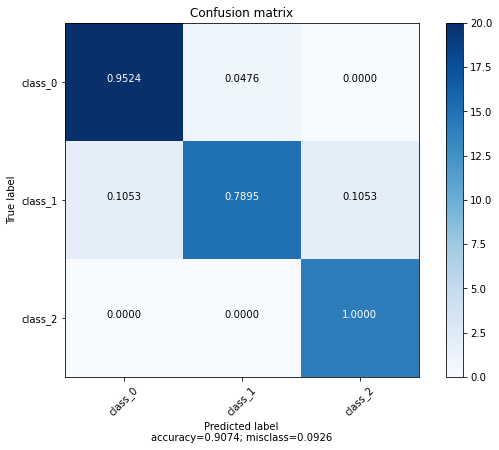

In [14]:
plot_confusion_matrix(cm,wine.target_names)